In [11]:
%pip install pandas numpy
%pip install openpyxl matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 48.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

customer = pd.read_excel('customer_data.xlsx')
customer

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash
...,...,...,...,...
99452,C441542,Female,45.0,Credit Card
99453,C569580,Male,27.0,Cash
99454,C103292,Male,63.0,Debit Card
99455,C800631,Male,56.0,Cash


In [10]:
sales = pd.read_excel('sales_data.xlsx')
mall = pd.read_excel('shopping_mall_data.xlsx')

sales

,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall
0,I138884,C241288,Clothing,5,05/08/2022,1500.40,South Coast Plaza
1,I317333,C111565,Shoes,3,12/12/2021,1800.51,Beverly Center
2,I127801,C266599,Clothing,1,09/11/2021,300.08,Westfield Century City
3,I173702,C988172,Shoes,5,05/16/2021,3000.85,Stanford Shopping Center
4,I337046,C189076,Books,4,10/24/2021,60.60,South Coast Plaza
...,...,...,...,...,...,...,...
99452,I219422,C441542,Souvenir,5,09/21/2022,58.65,South Coast Plaza
99453,I325143,C569580,Food & Beverage,2,09/22/2021,10.46,Beverly Center
99454,I824010,C103292,Food & Beverage,2,03/28/2021,10.46,Westfield Century City
99455,I702964,C800631,Technology,4,03/16/2021,4200.00,Westfield Valley Fair


In [9]:
mall

,shopping_mall,construction_year,area (sqm),location,store_count
0,South Coast Plaza,1967,250000,Costa Mesa,270
1,Westfield Valley Fair,1986,220000,Santa Clara,230
2,The Grove,2002,56000,Los Angeles,140
3,Westfield Century City,1964,133000,Los Angeles,200
4,Beverly Center,1982,111000,Los Angeles,160
5,Fashion Valley,1977,161000,San Diego,180
6,Stanford Shopping Center,1956,120000,Palo Alto,140
7,Glendale Galleria,1976,145000,Glendale,190
8,Irvine Spectrum Center,1995,120000,Irvine,130
9,Del Amo Fashion Center,1961,232000,Torrance,220


We can have correlation between total sales for mall <-> store count, area, locaation, years of operation

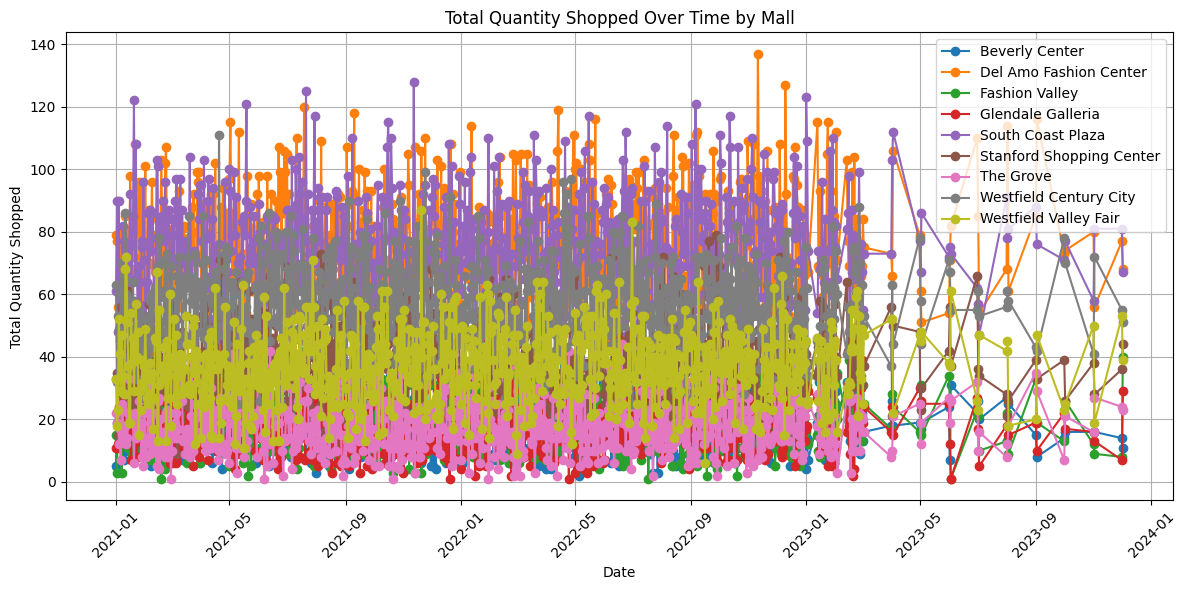

In [17]:
import matplotlib.pyplot as plt
merged_df = pd.merge(sales, mall, on='shopping_mall')

# Convert 'invoice_date' to datetime
merged_df['invoice date'] = pd.to_datetime(merged_df['invoice date'], format='%m/%d/%Y')

# Group by both shopping mall and date, then calculate total quantity for each group
quantity_by_mall_date = merged_df.groupby(['invoice date', 'shopping_mall'])['quantity'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each shopping mall's total quantity over time
for mall in quantity_by_mall_date['shopping_mall'].unique():
    mall_data = quantity_by_mall_date[quantity_by_mall_date['shopping_mall'] == mall]
    plt.plot(mall_data['invoice date'], mall_data['quantity'], marker='o', linestyle='-', label=mall)

# Adding labels and title
plt.title('Total Quantity Shopped Over Time by Mall')
plt.xlabel('Date')
plt.ylabel('Total Quantity Shopped')
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()